In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import ipywidgets as widgets
from IPython.display import clear_output

In [32]:
data=pd.read_csv("/content/MF_India_AI.csv")

In [33]:
data.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [34]:
data.tail()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
809,UTI-Unit Linked Insurance Plan – Direct,500,15000,0.96,5068.0,10,Amandeep Chopra,2.47,0.92,7.06,0.44,1.29,4,UTI Mutual Fund,0,Hybrid,Dynamic Asset Allocation or Balanced Advantage,-0.7,13.1,6.2
810,UTI-Value Opportunities Fund,500,5000,1.16,6740.0,10,Vetri Subramaniam,3.21,2.73,15.62,0.9,1.48,6,UTI Mutual Fund,4,Equity,Value Funds,1.7,27.2,12.2
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN
812,WhiteOak Capital Overnight Fund,500,500,0.22,14.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,1,WhiteOak Capital Mutual Fund,1,Debt,Overnight Mutual Funds,1.7,32.4,13.3
813,WhiteOak Capital Ultra Short Term Fund,500,500,0.33,141.0,4,Piyush Baranwal,2.81,1.2,0.72,0.47,0.8,1,WhiteOak Capital Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,4.5,NaN


In [35]:
data.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [37]:
data.corr()

<ipython-input-37-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
min_sip,1.000000,0.236304,-0.119078,-0.111495,0.014810,-0.151352,0.111263,-0.049756,-0.170920,-0.139350
min_lumpsum,0.236304,1.000000,-0.006859,-0.142937,0.030491,-0.102806,0.026659,0.072438,-0.072814,-0.034561
expense_ratio,-0.119078,-0.006859,1.000000,-0.109883,0.180308,0.580970,-0.279715,-0.041015,0.495615,0.241636
fund_size_cr,-0.111495,-0.142937,-0.109883,1.000000,0.211195,0.006744,0.194323,0.002586,-0.000793,0.056308
fund_age_yr,0.014810,0.030491,0.180308,0.211195,1.000000,0.133440,0.090160,0.065085,-0.012414,-0.110896
risk_level,-0.151352,-0.102806,0.580970,0.006744,0.133440,1.000000,-0.170460,-0.176473,0.794269,0.645521
rating,0.111263,0.026659,-0.279715,0.194323,0.090160,-0.170460,1.000000,0.260413,-0.130421,0.020079
returns_1yr,-0.049756,0.072438,-0.041015,0.002586,0.065085,-0.176473,0.260413,1.000000,-0.071401,-0.168604
returns_3yr,-0.170920,-0.072814,0.495615,-0.000793,-0.012414,0.794269,-0.130421,-0.071401,1.000000,0.810370
returns_5yr,-0.139350,-0.034561,0.241636,0.056308,-0.110896,0.645521,0.020079,-0.168604,0.810370,1.000000


In [38]:
data.groupby(['amc_name'])['returns_5yr'].mean()

amc_name
Aditya Birla Sun Life Mutual Fund     8.548837
Axis Mutual Fund                      9.716667
Bandhan Mutual Fund                   6.900000
Bank of India Mutual Fund             7.054545
Baroda BNP Paribas Mutual Fund        8.370588
Canara Robeco Mutual Fund             9.706250
DSP Mutual Fund                       8.903448
Edelweiss Mutual Fund                 9.817647
Franklin Templeton Mutual Fund        9.908333
HDFC Mutual Fund                      9.510811
HSBC Mutual Fund                      8.246875
ICICI Prudential Mutual Fund         10.634043
IDBI Mutual Fund                      8.657143
IIFL Mutual Fund                      9.800000
ITI Mutual Fund                            NaN
Indiabulls Mutual Fund                6.533333
Invesco Mutual Fund                   9.018182
JM Financial Mutual Fund              8.500000
Kotak Mahindra Mutual Fund           10.239286
L&T Mutual Fund                      11.700000
LIC Mutual Fund                       8.668750
Mahi

In [39]:
a= data.groupby(['amc_name'])['returns_5yr'].mean().nlargest()
b= data.groupby(['category'])['returns_5yr'].mean()

In [40]:
a

amc_name
Quant Mutual Fund               17.927273
PPFAS Mutual Fund               17.600000
WhiteOak Capital Mutual Fund    13.300000
L&T Mutual Fund                 11.700000
Navi Mutual Fund                11.300000
Name: returns_5yr, dtype: float64

In [41]:
b

category
Debt                  6.385446
Equity               12.069767
Hybrid                8.581053
Other                10.710938
Solution Oriented     9.747059
Name: returns_5yr, dtype: float64

<ipython-input-42-1a6e02674905>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a.values, y=a.index, palette='viridis')


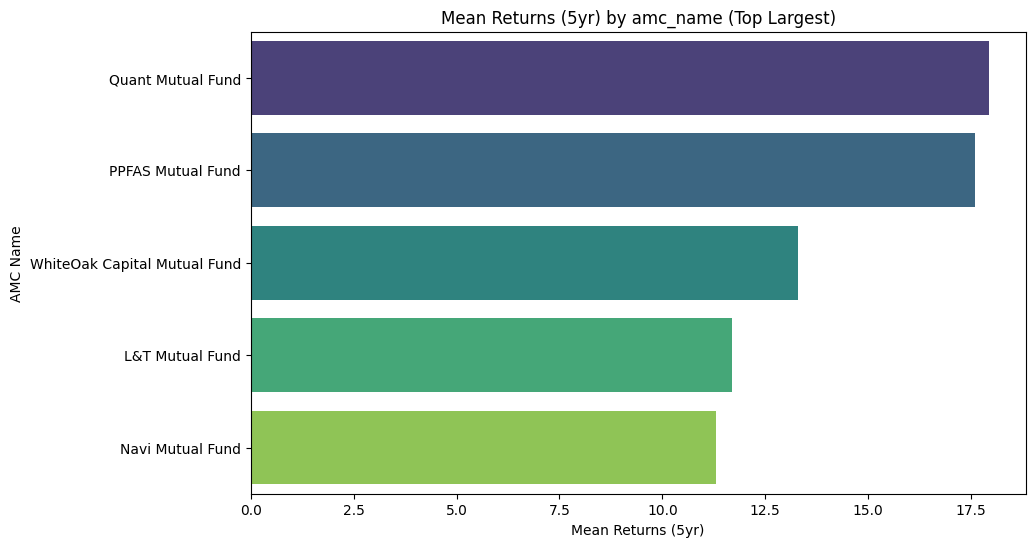

<ipython-input-42-1a6e02674905>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b.values, y=b.index, palette='viridis')


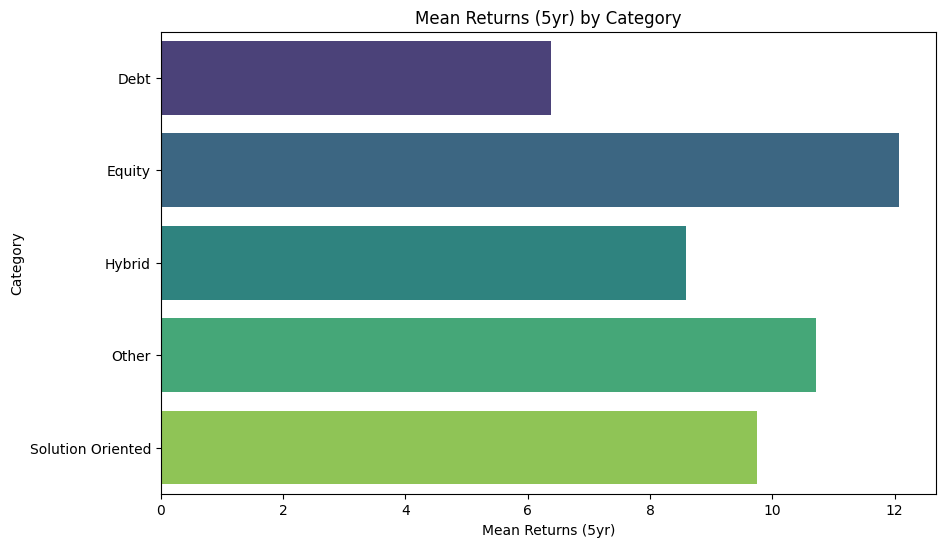

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x=a.values, y=a.index, palette='viridis')
plt.title('Mean Returns (5yr) by amc_name (Top Largest)')
plt.xlabel('Mean Returns (5yr)')
plt.ylabel('AMC Name')
plt.show()

# Plotting for 'b'
plt.figure(figsize=(10, 6))
sns.barplot(x=b.values, y=b.index, palette='viridis')
plt.title('Mean Returns (5yr) by Category')
plt.xlabel('Mean Returns (5yr)')
plt.ylabel('Category')
plt.show()

In [43]:
c= data.groupby(['sub_category'])['returns_5yr'].mean()

In [44]:
c

sub_category
Aggressive Hybrid Mutual Funds                    10.952000
Arbitrage Mutual Funds                             5.223529
Banking and PSU Mutual Funds                       6.956250
Childrens Funds                                    9.728571
Conservative Hybrid Mutual Funds                   7.341176
Contra Funds                                      14.033333
Corporate Bond Mutual Funds                        7.392857
Credit Risk Funds                                  4.785714
Dividend Yield Funds                              11.920000
Dynamic Asset Allocation or Balanced Advantage     8.650000
Dynamic Bond                                       7.231579
ELSS Mutual Funds                                 11.773333
Equity Savings Mutual Funds                        8.080000
Fixed Maturity Plans                              14.000000
Flexi Cap Funds                                   12.000000
Floater Mutual Funds                               6.840000
FoFs Domestic              

<ipython-input-45-c060a0710f6f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c.values, y=c.index, palette='viridis')


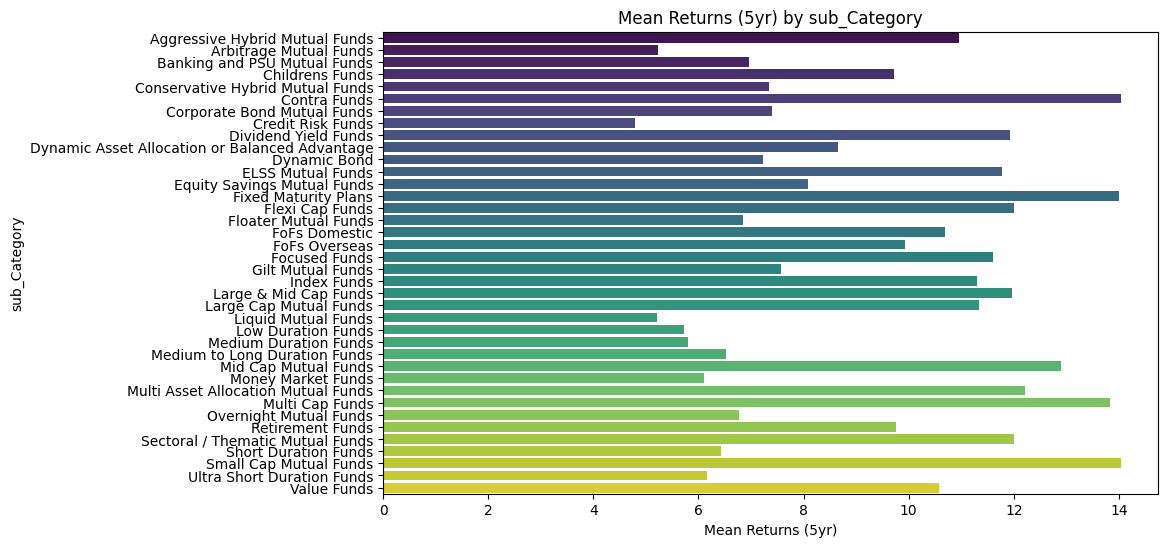

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=c.values, y=c.index, palette='viridis')
plt.title('Mean Returns (5yr) by sub_Category')
plt.xlabel('Mean Returns (5yr)')
plt.ylabel('sub_Category')
plt.show()

In [46]:
# Graph for rattings
d= data.groupby(['rating'])['returns_5yr'].count().nlargest()
d

rating
3    197
4    132
2    124
0     84
5     65
Name: returns_5yr, dtype: int64

<ipython-input-47-152a2eef9af8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d.values, y=d.index, palette='viridis')


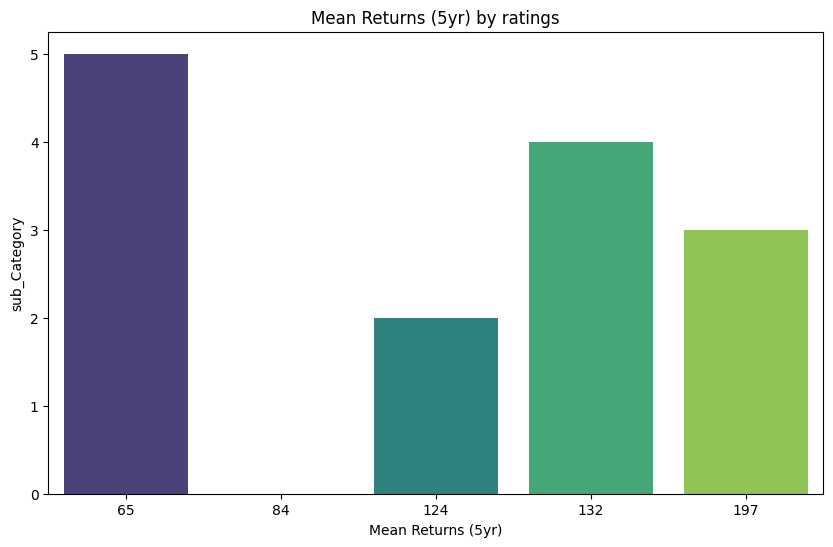

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=d.values, y=d.index, palette='viridis')
plt.title('Mean Returns (5yr) by ratings')
plt.xlabel('Mean Returns (5yr)')
plt.ylabel('sub_Category')
plt.show()

In [48]:
# Function to handle dropdown selection
def plot_graph(column, sub_column=None):
    plt.figure(figsize=(10, 6))
    plt.clf()  # Clear current figure
    if sub_column is None:
        data[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Graph of {column}')
        plt.xlabel(column)
    else:
        filtered_data = data[data['category'] == sub_column]
        if not filtered_data.empty:
            filtered_data[column].value_counts().plot(kind='bar')
            plt.title(f'Bar Graph of {column} for {sub_column}')
            plt.xlabel(column + ' (' + sub_column + ')')
        else:
            plt.text(0.5, 0.5, 'No data available for selected sub-category', horizontalalignment='center', verticalalignment='center')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Dropdown widget for main column selection
dropdown = widgets.Dropdown(
    options=data.columns,
    description='Select Column:',
    disabled=False,
)

# Dropdown widget for sub-category selection
sub_dropdown = widgets.Dropdown(
    description='Select Sub-Category:',
    disabled=True,
)

# Button widget to trigger plot
search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to plot graph',
    icon='search'  # (FontAwesome names without the `fa-` prefix)
)

output = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    output.clear_output()
    with output:
        plot_graph(dropdown.value, sub_dropdown.value if not sub_dropdown.disabled else None)

# Event handler for main dropdown selection
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if change['new'] in ['category', 'sub_category']:
            sub_dropdown.options = sorted(data[change['new']].unique())
            sub_dropdown.disabled = False
        else:
            sub_dropdown.disabled = True
            sub_dropdown.value = None
        output.clear_output()
        with output:
            plot_graph(change['new'])

# Event handler for sub-dropdown selection
def on_sub_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        output.clear_output()
        with output:
            plot_graph(dropdown.value, change['new'])

# Registering event handlers
dropdown.observe(on_change)
sub_dropdown.observe(on_sub_change)
search_button.on_click(on_button_click)

# Displaying widgets
display(dropdown)
display(sub_dropdown)
display(search_button)
display(output)

Dropdown(description='Select Column:', options=('scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio', 'fun…

Dropdown(description='Select Sub-Category:', disabled=True, options=(), value=None)

Button(description='Search', icon='search', style=ButtonStyle(), tooltip='Click to plot graph')

Output()

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame
encoder = LabelEncoder()
data['category'] = encoder.fit_transform(data['category'])
data['sub_category'] = encoder.fit_transform(data['sub_category'])
data['scheme_name'] = encoder.fit_transform(data['scheme_name'])

In [50]:
from sklearn.preprocessing import LabelEncoder

# Define the label encoder
encoder = LabelEncoder()
data['category'] = encoder.fit_transform(data['category'])
data['sub_category']= encoder.fit_transform(data['sub_category'])
data['scheme_name'] = encoder.fit_transform(data['scheme_name'])
data['amc_name'] =  encoder.fit_transform(data['amc_name'])
data['fund_manager'] = encoder.fit_transform(data['fund_manager'])
data['sortino'] = pd.to_numeric(data['sortino'], errors='coerce')
data['sortino'] = data['sortino'].fillna(data['sortino'].mean())
data['alpha'] = pd.to_numeric(data['alpha'], errors='coerce')
data['alpha'] = data['alpha'].fillna(data['alpha'].mean())
data['sd'] = pd.to_numeric(data['sd'], errors='coerce')
data['sd'] = data['sd'].fillna(data['sd'].mean())
data['beta'] = pd.to_numeric(data['beta'], errors='coerce')
data['beta'] = data['beta'].fillna(data['beta'].mean())
data['sharpe'] = pd.to_numeric(data['sharpe'], errors='coerce')
data['sharpe'] = data['sharpe'].fillna(data['sharpe'].mean())
data['risk_level'] = pd.to_numeric(data['risk_level'], errors='coerce')
data['amc_name'] = pd.to_numeric(data['amc_name'], errors='coerce')


In [51]:
data.head(15)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,33,100,100,0.27,10.0,10,102,0.32,2.240000,9.39,0.010000,0.24,3,0,3,3,16,4.0,6.5,6.9
1,34,1000,1000,0.36,4288.0,10,113,1.33,1.530000,0.72,0.560000,1.10,1,0,3,2,1,5.6,4.8,5.5
2,35,1000,1000,0.53,157.0,10,251,3.44,2.670000,10.58,0.670000,1.42,5,0,3,3,16,2.0,18.9,9.7
3,36,500,1000,0.76,637.0,4,47,2.18,-6.370000,14.99,0.850000,0.90,6,0,2,4,3,-0.7,17.1,NaN
4,37,100,100,0.61,6386.0,10,130,3.69,1.990000,10.38,0.680000,1.39,6,0,4,2,9,4.5,18.6,9.7
5,38,1000,1000,1.17,2384.0,9,67,2.07,1.240000,25.53,0.960000,0.97,6,0,2,1,33,5.3,24.6,9.2
6,39,1000,1000,0.37,7994.0,10,102,1.92,4.460000,1.91,1.780000,1.09,3,0,4,0,2,4.5,6.8,7.3
7,40,1000,1000,1.29,15.0,10,251,1.42,2.505635,20.18,0.822241,1.06,6,0,0,1,33,-10.3,29.4,9.3
8,41,100,100,0.31,12120.0,10,102,2.28,2.380000,1.93,0.780000,1.35,2,0,4,0,6,4.9,7.1,7.4
9,42,100,100,0.69,1032.0,8,225,1.82,3.010000,2.90,-0.950000,1.47,4,0,4,0,7,8.7,9.0,7.2


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    int64  
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    int64  
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    int64  
 14  rating         814 non-null    int64  
 15  category       814 non-null    int64  
 16  sub_category   814 non-null    int64  
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [54]:
if data['returns_3yr'].isnull().any() or data['returns_5yr'].isnull().any():
    data1 = data.dropna(subset=['returns_3yr'])
    data1 = data.dropna(subset=['returns_5yr'])
else :
  data1 = data

In [55]:
data1.head(15)

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,33,100,100,0.27,10.0,10,102,0.32,2.240000,9.39,0.010000,0.24,3,0,3,3,16,4.0,6.5,6.9
1,34,1000,1000,0.36,4288.0,10,113,1.33,1.530000,0.72,0.560000,1.10,1,0,3,2,1,5.6,4.8,5.5
2,35,1000,1000,0.53,157.0,10,251,3.44,2.670000,10.58,0.670000,1.42,5,0,3,3,16,2.0,18.9,9.7
4,37,100,100,0.61,6386.0,10,130,3.69,1.990000,10.38,0.680000,1.39,6,0,4,2,9,4.5,18.6,9.7
5,38,1000,1000,1.17,2384.0,9,67,2.07,1.240000,25.53,0.960000,0.97,6,0,2,1,33,5.3,24.6,9.2
6,39,1000,1000,0.37,7994.0,10,102,1.92,4.460000,1.91,1.780000,1.09,3,0,4,0,2,4.5,6.8,7.3
7,40,1000,1000,1.29,15.0,10,251,1.42,2.505635,20.18,0.822241,1.06,6,0,0,1,33,-10.3,29.4,9.3
8,41,100,100,0.31,12120.0,10,102,2.28,2.380000,1.93,0.780000,1.35,2,0,4,0,6,4.9,7.1,7.4
9,42,100,100,0.69,1032.0,8,225,1.82,3.010000,2.90,-0.950000,1.47,4,0,4,0,7,8.7,9.0,7.2
10,43,100,1000,0.88,3338.0,10,109,2.42,9.370000,21.12,0.830000,1.53,6,0,0,1,33,-14.6,39.8,21.1


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'data' is your pandas DataFrame

if data['returns_3yr'].isnull().any() or data['returns_5yr'].isnull().any():
    data1 = data.dropna(subset=['returns_3yr', 'returns_5yr'])
else:
    data1 = data

# For the 1st return
X = data1.drop(columns=['returns_1yr'])
y = data1['returns_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (1st return):", mse_1)

mae_1 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (1st return):", mae_1)

r_squared_1 = r2_score(y_test, y_pred)
print("R-squared (1st return):", r_squared_1)


# For the 3rd return
X = data1.drop(columns=['returns_3yr'])
y = data1['returns_3yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse_3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (3rd return):", mse_3)

mae_3 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (3rd return):", mae_3)

r_squared_3 = r2_score(y_test, y_pred)
print("R-squared (3rd return):", r_squared_3)


# For the 5th return
X = data1.drop(columns=['returns_5yr'])
y = data1['returns_5yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse_5 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (5th return):", mse_5)

mae_5 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (5th return):", mae_5)

r_squared_5 = r2_score(y_test, y_pred)
print("R-squared (5th return):", r_squared_5)


Mean Squared Error (1st return): 149.76163446923078
Mean Absolute Error (1st return): 3.1736384615384616
R-squared (1st return): -0.015772940348276032
Mean Squared Error (3rd return): 6.0473845384615394
Mean Absolute Error (3rd return): 1.2536615384615377
R-squared (3rd return): 0.9598314961332123
Mean Squared Error (5th return): 5.233323600000001
Mean Absolute Error (5th return): 1.273338461538462
R-squared (5th return): 0.6259670203880846


In [57]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'data' is your pandas DataFrame

if data['returns_3yr'].isnull().any() or data['returns_5yr'].isnull().any():
    data1 = data.dropna(subset=['returns_3yr', 'returns_5yr'])
else:
    data1 = data

# For the 1st return
X = data1.drop(columns=['returns_1yr'])
y = data1['returns_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (1st return):", mse_1)

mae_1 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (1st return):", mae_1)

r_squared_1 = r2_score(y_test, y_pred)
print("R-squared (1st return):", r_squared_1)


# For the 3rd return
X = data1.drop(columns=['returns_3yr'])
y = data1['returns_3yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse_3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (3rd return):", mse_3)

mae_3 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (3rd return):", mae_3)

r_squared_3 = r2_score(y_test, y_pred)
print("R-squared (3rd return):", r_squared_3)


# For the 5th return
X = data1.drop(columns=['returns_5yr'])
y = data1['returns_5yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse_5 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (5th return):", mse_5)

mae_5 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (5th return):", mae_5)

r_squared_5 = r2_score(y_test, y_pred)
print("R-squared (5th return):", r_squared_5)


Mean Squared Error (1st return): 124.9815671721073
Mean Absolute Error (1st return): 3.621578885032782
R-squared (1st return): 0.15230029088771702
Mean Squared Error (3rd return): 22.964284356196533
Mean Absolute Error (3rd return): 3.1642940721257182
R-squared (3rd return): 0.847464480042051
Mean Squared Error (5th return): 4.472317132362066
Mean Absolute Error (5th return): 1.4658363986397607
R-squared (5th return): 0.6803572202592632


In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Assuming 'data' is your pandas DataFrame

if data['returns_3yr'].isnull().any() or data['returns_5yr'].isnull().any():
    data1 = data.dropna(subset=['returns_3yr', 'returns_5yr'])
else:
    data1 = data

# For the 1st return
X = data1.drop(columns=['returns_1yr'])
y = data1['returns_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (1st return):", mse_1)

mae_1 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (1st return):", mae_1)

r_squared_1 = r2_score(y_test, y_pred)
print("R-squared (1st return):", r_squared_1)


# For the 3rd return
X = data1.drop(columns=['returns_3yr'])
y = data1['returns_3yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse_3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (3rd return):", mse_3)

mae_3 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (3rd return):", mae_3)

r_squared_3 = r2_score(y_test, y_pred)
print("R-squared (3rd return):", r_squared_3)


# For the 5th return
X = data1.drop(columns=['returns_5yr'])
y = data1['returns_5yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse_5 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (5th return):", mse_5)

mae_5 = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (5th return):", mae_5)

r_squared_5 = r2_score(y_test, y_pred)
print("R-squared (5th return):", r_squared_5)


Mean Squared Error (1st return): 168.00430769230766
Mean Absolute Error (1st return): 4.055384615384615
R-squared (1st return): -0.13950565657624114
Mean Squared Error (3rd return): 13.35323076923077
Mean Absolute Error (3rd return): 2.0015384615384613
R-squared (3rd return): 0.9113039201696921
Mean Squared Error (5th return): 8.540153846153846
Mean Absolute Error (5th return): 1.8353846153846154
R-squared (5th return): 0.3896232234862982


In [59]:
results = []

# For the 1st return
X = data1.drop(columns=['returns_1yr'])
y = data1['returns_1yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf_1 = mean_squared_error(y_test, y_pred_rf)
mae_rf_1 = mean_absolute_error(y_test, y_pred_rf)
r_squared_rf_1 = r2_score(y_test, y_pred_rf)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
mse_lr_1 = mean_squared_error(y_test, y_pred_lr)
mae_lr_1 = mean_absolute_error(y_test, y_pred_lr)
r_squared_lr_1 = r2_score(y_test, y_pred_lr)

# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
mse_dt_1 = mean_squared_error(y_test, y_pred_dt)
mae_dt_1 = mean_absolute_error(y_test, y_pred_dt)
r_squared_dt_1 = r2_score(y_test, y_pred_dt)

results.append({'Return Period': '1st',
                'MSE (Random Forest)': mse_rf_1, 'MAE (Random Forest)': mae_rf_1, 'R-squared (Random Forest)': r_squared_rf_1,
                'MSE (Linear Regression)': mse_lr_1, 'MAE (Linear Regression)': mae_lr_1, 'R-squared (Linear Regression)': r_squared_lr_1,
                'MSE (Decision Tree)': mse_dt_1, 'MAE (Decision Tree)': mae_dt_1, 'R-squared (Decision Tree)': r_squared_dt_1})

# For the 3rd return
X = data1.drop(columns=['returns_3yr'])
y = data1['returns_3yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf_3 = mean_squared_error(y_test, y_pred_rf)
mae_rf_3 = mean_absolute_error(y_test, y_pred_rf)
r_squared_rf_3 = r2_score(y_test, y_pred_rf)

# Linear Regression
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
mse_lr_3 = mean_squared_error(y_test, y_pred_lr)
mae_lr_3 = mean_absolute_error(y_test, y_pred_lr)
r_squared_lr_3 = r2_score(y_test, y_pred_lr)

# Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
mse_dt_3 = mean_squared_error(y_test, y_pred_dt)
mae_dt_3 = mean_absolute_error(y_test, y_pred_dt)
r_squared_dt_3 = r2_score(y_test, y_pred_dt)

results.append({'Return Period': '3rd',
                'MSE (Random Forest)': mse_rf_3, 'MAE (Random Forest)': mae_rf_3, 'R-squared (Random Forest)': r_squared_rf_3,
                'MSE (Linear Regression)': mse_lr_3, 'MAE (Linear Regression)': mae_lr_3, 'R-squared (Linear Regression)': r_squared_lr_3,
                'MSE (Decision Tree)': mse_dt_3, 'MAE (Decision Tree)': mae_dt_3, 'R-squared (Decision Tree)': r_squared_dt_3})

# For the 5th return
X = data1.drop(columns=['returns_5yr'])
y = data1['returns_5yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf_5 = mean_squared_error(y_test, y_pred_rf)
mae_rf_5 = mean_absolute_error(y_test, y_pred_rf)
r_squared_rf_5 = r2_score(y_test, y_pred_rf)

# Linear Regression
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
mse_lr_5 = mean_squared_error(y_test, y_pred_lr)
mae_lr_5 = mean_absolute_error(y_test, y_pred_lr)
r_squared_lr_5 = r2_score(y_test, y_pred_lr)

# Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
mse_dt_5 = mean_squared_error(y_test, y_pred_dt)
mae_dt_5 = mean_absolute_error(y_test, y_pred_dt)
r_squared_dt_5 = r2_score(y_test, y_pred_dt)

results.append({'Return Period': '5th',
                'MSE (Random Forest)': mse_rf_5, 'MAE (Random Forest)': mae_rf_5, 'R-squared (Random Forest)': r_squared_rf_5,
                'MSE (Linear Regression)': mse_lr_5, 'MAE (Linear Regression)': mae_lr_5, 'R-squared (Linear Regression)': r_squared_lr_5,
                'MSE (Decision Tree)': mse_dt_5, 'MAE (Decision Tree)': mae_dt_5, 'R-squared (Decision Tree)': r_squared_dt_5})

# Create DataFrame and print results
df_results = pd.DataFrame(results)
print(df_results)

  Return Period  MSE (Random Forest)  MAE (Random Forest)  \
0           1st           149.761634             3.173638   
1           3rd             6.047385             1.253662   
2           5th             5.233324             1.273338   

   R-squared (Random Forest)  MSE (Linear Regression)  \
0                  -0.015773               124.981567   
1                   0.959831                22.964284   
2                   0.625967                 4.472317   

   MAE (Linear Regression)  R-squared (Linear Regression)  \
0                 3.621579                       0.152300   
1                 3.164294                       0.847464   
2                 1.465836                       0.680357   

   MSE (Decision Tree)  MAE (Decision Tree)  R-squared (Decision Tree)  
0           168.004308             4.055385                  -0.139506  
1            13.353231             2.001538                   0.911304  
2             8.540154             1.835385                   

In [60]:
avg_metrics = df_results.mean()

# Find the model with the lowest average MSE and MAE and the highest average R-squared value
best_model_mse_mae = avg_metrics[['MSE (Random Forest)', 'MAE (Random Forest)',
                                  'MSE (Linear Regression)', 'MAE (Linear Regression)',
                                  'MSE (Decision Tree)', 'MAE (Decision Tree)']].idxmin()

best_model_r_squared = avg_metrics[['R-squared (Random Forest)', 'R-squared (Linear Regression)',
                                    'R-squared (Decision Tree)']].idxmax()

print("Best model based on MSE and MAE:", best_model_mse_mae)
print("Best model based on R-squared:", best_model_r_squared)

Best model based on MSE and MAE: MAE (Random Forest)
Best model based on R-squared: R-squared (Linear Regression)


<ipython-input-60-35e3a24bdf8a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg_metrics = df_results.mean()


## RECOMMENDATION ON THE BASIS OF RETURNS AND CATEGORIES

In [61]:
data.fillna(data.mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    int64  
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    int64  
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    int64  
 14  rating         814 non-null    int64  
 15  category       814 non-null    int64  
 16  sub_category   814 non-null    int64  
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display

# Sample data loading (replace with your actual data)
data = pd.read_csv('/content/MF_India_AI.csv')

# Impute missing values with the mean
data.fillna(data.mean(), inplace=True)

# Data Preprocessing
encoder = LabelEncoder()
data['category_encoded'] = encoder.fit_transform(data['category'])  # Encode category
scaler = StandardScaler()
data[['risk_level', 'returns_1yr', 'returns_3yr', 'returns_5yr']] = scaler.fit_transform(data[['risk_level', 'returns_1yr', 'returns_3yr', 'returns_5yr']])  # Normalize numerical columns

# Calculate Cosine Similarity
def calculate_similarity(target, data):
    similarity_scores = cosine_similarity(target, data)
    return similarity_scores

# Recommend Similar Schemes based on user input
def recommend_similar_schemes(user_input, data, top_n=5):
    target = pd.DataFrame(user_input, index=[0])  # Create DataFrame from user input
    target['category_encoded'] = encoder.transform([user_input['category']])[0]  # Encode user input category
    target_data = target[['category_encoded', 'risk_level', 'returns_1yr', 'returns_3yr', 'returns_5yr']]  # Include relevant columns
    data_features = data[['category_encoded', 'risk_level', 'returns_1yr', 'returns_3yr', 'returns_5yr']]
    similarity_scores = calculate_similarity(target_data, data_features)
    sim_scores_df = pd.DataFrame(similarity_scores.reshape(-1, 1), columns=['similarity'], index=data.index)
    recommended_schemes = pd.concat([data, sim_scores_df], axis=1)
    recommended_schemes = recommended_schemes.sort_values(by='similarity', ascending=False).head(top_n)
    return recommended_schemes[['scheme_name', 'similarity']]

# Initialize user input dictionary
user_input = {
    'category': data['category'].unique()[0],  # Initialize with the first category option
    'risk_level': None,
    'returns_1yr': None,
    'returns_3yr': None,
    'returns_5yr': None
}


# Function to handle dropdown change event
def on_category_change(change):
    user_input['category'] = change.new

# Function to handle textbox change event
def on_textbox_change(change):
    user_input[change.owner.description.replace(':', '')] = change.new

# Function to handle search button click event
def on_search_button_click(button):
    recommendations = recommend_similar_schemes(user_input, data)
    print("Top 5 Recommended Schemes:")
    print(recommendations)

# Dropdown widget for selecting the category
category_dropdown = widgets.Dropdown(
    options=data['category'].unique(),
    description='Select Category:',
    disabled=False,
)

# Textbox widget for entering risk level
risk_level_textbox = widgets.BoundedIntText(
    value=3,
    min=1,
    max=5,
    step=1,
    description='Risk Level:',
    disabled=False
)

# Textbox widgets for entering returns for different time periods
returns_1yr_textbox = widgets.FloatText(
    value=0.0,
    description='Returns 1yr:',
    disabled=False
)

returns_3yr_textbox = widgets.FloatText(
    value=0.0,
    description='Returns 3yr:',
    disabled=False
)

returns_5yr_textbox = widgets.FloatText(
    value=0.0,
    description='Returns 5yr:',
    disabled=False
)

# Search button
search_button = widgets.Button(description="Search")
search_button.on_click(on_search_button_click)

# Registering event handlers
category_dropdown.observe(on_category_change, names='value')
risk_level_textbox.observe(on_textbox_change, names='value')
returns_1yr_textbox.observe(on_textbox_change, names='value')
returns_3yr_textbox.observe(on_textbox_change, names='value')
returns_5yr_textbox.observe(on_textbox_change, names='value')

# Displaying the widgets
display(category_dropdown)
display(risk_level_textbox)
display(returns_1yr_textbox)
display(returns_3yr_textbox)
display(returns_5yr_textbox)
display(search_button)


<ipython-input-62-8c93133c00b1>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Dropdown(description='Select Category:', options=('Other', 'Hybrid', 'Solution Oriented', 'Equity', 'Debt'), v…

BoundedIntText(value=3, description='Risk Level:', max=5, min=1)

FloatText(value=0.0, description='Returns 1yr:')

FloatText(value=0.0, description='Returns 3yr:')

FloatText(value=0.0, description='Returns 5yr:')

Button(description='Search', style=ButtonStyle())

# Recommendation System


In [63]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'data'
# Adjust the column names accordingly

# Extract unique values for each column
amc_names = data['amc_name'].unique()
categories = data['category'].unique()
subcategories = data['sub_category'].unique()

# Create a dictionary to map categories to their corresponding subcategories
subcategory_mapping = {category: data[data['category'] == category]['sub_category'].unique() for category in categories}

# Function to filter subcategory options for the "Hybrid" category
def filter_subcategories(category):
    if category == 'Hybrid':
        return data[data['category'] == 'Hybrid']['sub_category'].unique()
    else:
        return subcategory_mapping[category]

def enter_investment_details(amc_name, category, subcategory, tenure, amount_invested):
    print("\nInvestment Details:")
    print("AMC Name:", amc_name)
    print("Category:", category)
    print("Subcategory:", subcategory)
    print("Tenure:", tenure)
    print("Amount Invested:", amount_invested)

# Dropdown menus for AMC Name, Category, Subcategory, and Tenure
amc_name_dropdown = widgets.Dropdown(options=amc_names, description="AMC Name:")
category_dropdown = widgets.Dropdown(options=categories, description="Category:")
subcategory_dropdown = widgets.Dropdown(options=subcategories, description="Subcategory:")
tenure_dropdown = widgets.Dropdown(options=["1-3 yr", "3-5 yr", "around 5"], description="Tenure:")

# Numeric input for Amount Invested
amount_invested_input = widgets.BoundedFloatText(value=0, min=0, max=1000000, step=0.01, description="Amount Invested:")

# Display widgets
display(amc_name_dropdown, category_dropdown, subcategory_dropdown, tenure_dropdown, amount_invested_input)

# Function to update subcategory options based on selected category
def update_subcategories(change):
    selected_category = change['new']
    subcategory_dropdown.options = filter_subcategories(selected_category)

# Observe changes in the category dropdown and call the update_subcategories function
category_dropdown.observe(update_subcategories, names='value')

# Button to submit input
submit_button = widgets.Button(description="Submit")
display(submit_button)

def handle_submit_button_clicked(button):
    amc_name = amc_name_dropdown.value
    category = category_dropdown.value
    subcategory = subcategory_dropdown.value
    tenure = tenure_dropdown.value
    amount_invested = amount_invested_input.value

    enter_investment_details(amc_name, category, subcategory, tenure, amount_invested)

submit_button.on_click(handle_submit_button_clicked)


Dropdown(description='AMC Name:', options=('Aditya Birla Sun Life Mutual Fund', 'Axis Mutual Fund', 'Bandhan M…

Dropdown(description='Category:', options=('Other', 'Hybrid', 'Solution Oriented', 'Equity', 'Debt'), value='O…

Dropdown(description='Subcategory:', options=('FoFs Domestic', 'Arbitrage Mutual Funds', 'Childrens Funds', 'D…

Dropdown(description='Tenure:', options=('1-3 yr', '3-5 yr', 'around 5'), value='1-3 yr')

BoundedFloatText(value=0.0, description='Amount Invested:', max=1000000.0, step=0.01)

Button(description='Submit', style=ButtonStyle())

In [64]:
# Define the recommend_scheme_names function
def recommend_scheme_names(amc_name, category, subcategory, tenure, amount_invested):
    # Filter the dataset based on selected input values
    filtered_data = data[
        (data['amc_name'] == amc_name) &
        (data['category'] == category) &
        (data['sub_category'] == subcategory)
       ]

    # Check if any schemes are found matching the criteria
    if not filtered_data.empty:
        # Define columns for sorting
        arrange_columns1 = ['sortino', 'alpha', 'sharpe', 'rating']
        arrange_columns2 = ['beta', 'sd']

        # Sort the filtered data based on multiple sets of columns
        arranged_data1 = filtered_data.sort_values(by=arrange_columns1, ascending=False)
        arranged_data2 = filtered_data.sort_values(by=arrange_columns2, ascending=True)

        # Combine the recommendations from both sorted dataframes
        recommended_schemes = (arranged_data1['scheme_name'].head(5) + arranged_data2['scheme_name'].head(5)).tolist()

        return recommended_schemes
    else:
        return []

# Example usage (assuming data and other dependencies are defined/imported)
amc_name = amc_name_dropdown.value
category = category_dropdown.value
subcategory = subcategory_dropdown.value
tenure = tenure_dropdown.value
amount_invested = amount_invested_input.value

# Get recommendations
import math
recommendations = recommend_scheme_names(amc_name, category, subcategory, tenure, amount_invested)
recommendations = [scheme for scheme in recommendations if not (isinstance(scheme, float) and math.isnan(scheme))]
# Print the recommendations
if recommendations:
    print("Top 5 Recommended Scheme Names:")
    for i, scheme_name in enumerate(recommendations, start=1):

        print(f"{i}. {scheme_name}")
else:
    print("No schemes found matching the criteria.")


Top 5 Recommended Scheme Names:
1. Aditya Birla SL Asset Allocator FoF-Dir GrowthAditya Birla SL Asset Allocator FoF-Dir Growth
2. Aditya Birla SL FP FoF – Aggressive – Direct GrowthAditya Birla SL FP FoF – Aggressive – Direct Growth
3. Aditya Birla SL FP FoF – Conservative – Direct GrowthAditya Birla SL FP FoF – Conservative – Direct Growth
4. Aditya Birla SL FP FoF – Moderate – Direct GrowthAditya Birla SL FP FoF – Moderate – Direct Growth


Portfolio Diversification &            Calculator

In [65]:
# Load the mutual fund data
mutual_funds_data = pd.read_csv('/content/MF_India_AI.csv')

# Function to calculate potential returns
def calculate_returns(investment_amount, duration_years, selected_scheme):
    # Filter data for the selected scheme
    scheme_data = mutual_funds_data[mutual_funds_data['scheme_name'] == selected_scheme]

    # Get returns for different time periods
    returns_1yr = scheme_data['returns_1yr'].iloc[0] / 100
    returns_3yr = scheme_data['returns_3yr'].iloc[0] / 100
    returns_5yr = scheme_data['returns_5yr'].iloc[0] / 100

    # Calculate potential returns
    returns_1yr_amount = investment_amount * (1 + returns_1yr) ** duration_years
    returns_3yr_amount = investment_amount * (1 + returns_3yr) ** duration_years
    returns_5yr_amount = investment_amount * (1 + returns_5yr) ** duration_years

    return returns_1yr_amount, returns_3yr_amount, returns_5yr_amount

# User input
investment_amount = float(input("Enter investment amount (INR): "))
duration_years = int(input("Enter investment duration (years): "))
selected_scheme = input("Enter selected scheme: ")

# Calculate potential returns
returns_1yr_amount, returns_3yr_amount, returns_5yr_amount = calculate_returns(investment_amount, duration_years, selected_scheme)

# Display potential returns
print("\nPotential Returns after", duration_years, "years for", selected_scheme)
print("Returns after 1 year:", round(returns_1yr_amount, 2), "INR")
print("Returns after 3 years:", round(returns_3yr_amount, 2), "INR")
print("Returns after 5 years:", round(returns_5yr_amount, 2), "INR")

Enter investment amount (INR): 10000
Enter investment duration (years): 3
Enter selected scheme: Aditya Birla SL Arbitrage Fund

Potential Returns after 3 years for Aditya Birla SL Arbitrage Fund
Returns after 1 year: 11775.84 INR
Returns after 3 years: 11510.23 INR
Returns after 5 years: 11742.41 INR
